In [1]:
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import multiprocessing as mp
import scipy.stats as stats
from glob import glob

Scanpy has weird default values that are often immediately changed by convention. The first is that scanpy by default will only show warning+error messages. We would like to change this as it also offers 'Hints' if you set verbosity to 3.

In [2]:
sc.settings.verbosity = 3

Here we are simply iterating through all of the '*/outs/filtered_feature_bc_matrix' directories and importing the single cell dataset into a scanpy object. 

1. I generate a list of directory paths to cellranger output directories
2. I generate a dictionary containing anndata objects with sample_name as  `keys`
3. I concatinate these anndata objects into a single dataset 
4. I ensure that all the obs and var are unique

In [3]:
dirpaths = glob('/home/garvena/projects/def-dmberman/garvena/singlecellseq/Data/CellRanger/Lai/*/outs/filtered_feature_bc_matrix')
adatas = {dirpath.split('/')[10]: sc.read_10x_mtx(dirpath, var_names='gene_symbols', cache=True) for dirpath in dirpaths}
adata = ad.concat(adatas, label='sample')
adata.obs_names_make_unique
adata.var_names_make_unique

... reading from cache file cache/home-garvena-projects-def-dmberman-garvena-singlecellseq-Data-CellRanger-Lai-SRR9897621-outs-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/home-garvena-projects-def-dmberman-garvena-singlecellseq-Data-CellRanger-Lai-SRR12603780-outs-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/home-garvena-projects-def-dmberman-garvena-singlecellseq-Data-CellRanger-Lai-SRR9897625-outs-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/home-garvena-projects-def-dmberman-garvena-singlecellseq-Data-CellRanger-Lai-SRR9897622-outs-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/home-garvena-projects-def-dmberman-garvena-singlecellseq-Data-CellRanger-Lai-SRR12539462-outs-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/home-garvena-projects-def-dmberman-garvena-singlecellseq-Data-CellRanger-Lai-SRR12539463-outs-filtered_feature_bc_matrix-matrix.h5ad
.

/home/garvena/projects/def-dmberman/garvena/singlecellseq/ENV/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


<bound method AnnData.var_names_make_unique of AnnData object with n_obs × n_vars = 148967 × 36601
    obs: 'sample'>

normalizing counts per cell
    finished (0:00:28)


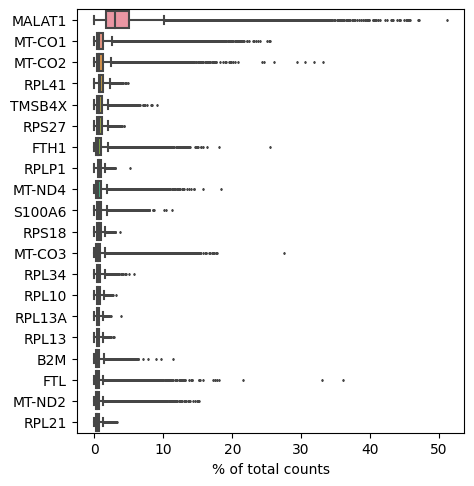

In [5]:
sc.pl.highest_expr_genes(adata, n_top=20, )